In [1]:
!pip install numpy
!pip install pandas
!pip install transformers


In [2]:
import numpy as np 
import pandas as pd 


df = pd.read_csv('datasetV2.csv')
df.head()

,ID,Summary,Reviews per Month
0,16976743,Charming yet Trendy Retreat- in my 2 bedroom w...,1.02
1,6556848,Grab your friends and make this two bedroom Br...,0.44
2,240918,A private bedroom in a shared apartment. One b...,1.96
3,4759718,"BEFORE BOOKING: PRIVATE rental only, June to A...",0.25
4,2591213,Beautiful private room on the garden/basement...,2.33


In [3]:

df = df.sample(frac=0.04, random_state=42)

In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader

from transformers import BertPreTrainedModel, BertModel, BertTokenizer

from sklearn import metrics
from sklearn.model_selection import train_test_split
from tqdm import tqdm, trange
import torch

'''
# Check if GPU is available
if torch.cuda.is_available():
    # Set the default tensor type to CUDA tensor
    torch.set_default_tensor_type(torch.cuda.FloatTensor)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

torch.set_default_device(device)'''


/home/bob/anaconda3/envs/newenvn/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


'\n# Check if GPU is available\nif torch.cuda.is_available():\n    # Set the default tensor type to CUDA tensor\n    torch.set_default_tensor_type(torch.cuda.FloatTensor)\ndevice = torch.device("cuda" if torch.cuda.is_available() else "cpu")\n\ntorch.set_default_device(device)'

In [5]:
import os
os.environ['TOKENIZERS_PARALLELISM']= "false"

In [6]:
df['SummaryClean']= df['Summary'].map(lambda x : str(x))

In [7]:
len(df.SummaryClean.tolist())

618

In [8]:
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification
tokenizer = AutoTokenizer.from_pretrained("Ashishkr/query_wellformedness_score")
model = AutoModelForSequenceClassification.from_pretrained("Ashishkr/query_wellformedness_score")

Some weights of the model checkpoint at Ashishkr/query_wellformedness_score were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [9]:
scores = []
model.eval()
with torch.no_grad():

    for i in df.SummaryClean.tolist():
        feature = tokenizer([i], padding=True, truncation=True, return_tensors="pt")
        scores.append(model(**feature).logits)


In [10]:
scores

[tensor([[0.1897]]),
 tensor([[0.2071]]),
 tensor([[0.4722]]),
 tensor([[0.2684]]),
 tensor([[0.7783]]),
 tensor([[0.2109]]),
 tensor([[0.1397]]),
 tensor([[0.2457]]),
 tensor([[0.1615]]),
 tensor([[0.0768]]),
 tensor([[0.3664]]),
 tensor([[0.2963]]),
 tensor([[0.2402]]),
 tensor([[0.1906]]),
 tensor([[0.6414]]),
 tensor([[0.0700]]),
 tensor([[0.3010]]),
 tensor([[0.1332]]),
 tensor([[0.3373]]),
 tensor([[0.2621]]),
 tensor([[0.2063]]),
 tensor([[0.1885]]),
 tensor([[0.2536]]),
 tensor([[0.1354]]),
 tensor([[0.2071]]),
 tensor([[0.2118]]),
 tensor([[0.3197]]),
 tensor([[0.1355]]),
 tensor([[0.4285]]),
 tensor([[0.1392]]),
 tensor([[0.5058]]),
 tensor([[0.3208]]),
 tensor([[0.2626]]),
 tensor([[0.4192]]),
 tensor([[0.1432]]),
 tensor([[0.3163]]),
 tensor([[0.2667]]),
 tensor([[0.1827]]),
 tensor([[0.4936]]),
 tensor([[0.4702]]),
 tensor([[0.4714]]),
 tensor([[0.2045]]),
 tensor([[0.2786]]),
 tensor([[0.2387]]),
 tensor([[0.6128]]),
 tensor([[0.1819]]),
 tensor([[0.1721]]),
 tensor([[0.3

In [11]:
scores[0]

tensor([[0.1897]])

In [12]:
!pip install matplotlib

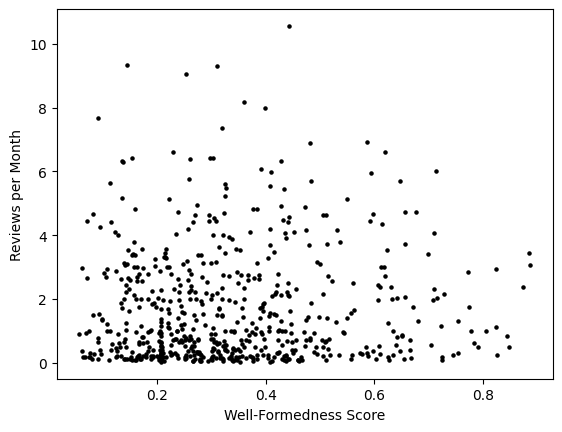

In [20]:
import matplotlib.pyplot as plt

# Create some sample data
x = df['Reviews per Month'].map(lambda x: float(x))
y_values = list(map(lambda x: float(x),scores))
y = y_values

# Plot the data
plt.scatter(y_values,x, s= 5, c="black")
plt.ylabel('Reviews per Month')  # Add a label to the y-axis
plt.xlabel('Well-Formedness Score')
plt.show()  # Display the plot


In [14]:
import numpy as np

In [17]:
np.corrcoef(x,y)[0,1]

0.04742264506921078